# Evaluate the re-rankers

In [1]:
import pandas as pd
import numpy as np
import pytrec_eval
import seaborn as sns
from matplotlib import pyplot as plt
import random

## Load the evaluation data

Should contain the similarity and Cohere reranker scores.

In [ ]:
nq_data = pd.read_json("data/NQ/chunks_bert_reranker_scores.jsonl", lines=True)
litqao_data = pd.read_json("data/LitQA2-options/chunks_bert_reranker_scores.jsonl", lines=True)
druid_data = pd.read_json("data/DRUID/chunks_bert_reranker_scores.jsonl", lines=True)
druidq_data = pd.read_json("data/DRUID-q/chunks_bert_reranker_scores.jsonl", lines=True)

# with prepended titles
nq_t_data = pd.read_json("data/NQ/chunks_w_titles_bert_reranker_scores.jsonl", lines=True)
litqao_t_data = pd.read_json("data/LitQA2-options/chunks_w_titles_bert_reranker_scores.jsonl", lines=True)
druid_t_data = pd.read_json("data/DRUID/chunks_w_titles_bert_reranker_scores.jsonl", lines=True)

# with prepended contexts
nq_c_data = pd.read_json("data/NQ/chunks_w_contexts_bert_reranker_scores.jsonl", lines=True)
litqao_c_data = pd.read_json("data/LitQA2-options/chunks_w_contexts_bert_reranker_scores.jsonl", lines=True)

### Load additional reranker scores
BAAI/bge-reranker-v2-gemma

In [ ]:
nq_data = nq_data.merge(pd.read_json("data/NQ/chunks_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
litqao_data = litqao_data.merge(pd.read_json("data/LitQA2-options/chunks_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
druid_data = druid_data.merge(pd.read_json("data/DRUID/chunks_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
druidq_data = druidq_data.merge(pd.read_json("data/DRUID-q/chunks_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)

nq_t_data = nq_t_data.merge(pd.read_json("data/NQ/chunks_w_titles_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
litqao_t_data = litqao_t_data.merge(pd.read_json("data/LitQA2-options/chunks_w_titles_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
druid_t_data = druid_t_data.merge(pd.read_json("data/DRUID/chunks_w_titles_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)

nq_c_data = nq_c_data.merge(pd.read_json("data/NQ/chunks_w_contexts_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)
litqao_c_data = litqao_c_data.merge(pd.read_json("data/LitQA2-options/chunks_w_contexts_bge_reranker_v2_gemma_rank.jsonl", lines=True)['bge_reranker_v2_gemma_rank'], left_index=True, right_index=True)

jinaai/jina-reranker-v1-turbo-en

In [ ]:
nq_data = nq_data.merge(pd.read_json("data/NQ/chunks_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
litqao_data = litqao_data.merge(pd.read_json("data/LitQA2-options/chunks_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
druid_data = druid_data.merge(pd.read_json("data/DRUID/chunks_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
druidq_data = druidq_data.merge(pd.read_json("data/DRUID-q/chunks_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)

nq_t_data = nq_t_data.merge(pd.read_json("data/NQ/chunks_w_titles_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
litqao_t_data = litqao_t_data.merge(pd.read_json("data/LitQA2-options/chunks_w_titles_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
druid_t_data = druid_t_data.merge(pd.read_json("data/DRUID/chunks_w_titles_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)

nq_c_data = nq_c_data.merge(pd.read_json("data/NQ/chunks_w_contexts_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)
litqao_c_data = litqao_c_data.merge(pd.read_json("data/LitQA2-options/chunks_w_contexts_jina_reranker_v1_turbo_en_rank.jsonl", lines=True)['jina_reranker_v1_turbo_en_rank'], left_index=True, right_index=True)

jinaai/jina-reranker-v2-base-multilingual

In [ ]:
nq_data = nq_data.merge(pd.read_json("data/NQ/chunks_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)
druid_data = druid_data.merge(pd.read_json("data/DRUID/chunks_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)
druidq_data = druidq_data.merge(pd.read_json("data/DRUID-q/chunks_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)

nq_t_data = nq_t_data.merge(pd.read_json("data/NQ/chunks_w_titles_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)
litqao_t_data = litqao_t_data.merge(pd.read_json("data/LitQA2-options/chunks_w_titles_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)
druid_t_data = druid_t_data.merge(pd.read_json("data/DRUID/chunks_w_titles_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)

nq_c_data = nq_c_data.merge(pd.read_json("data/NQ/chunks_w_contexts_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)
litqao_c_data = litqao_c_data.merge(pd.read_json("data/LitQA2-options/chunks_w_contexts_jina_reranker_v2_base_multilingual_rank.jsonl", lines=True)['jina_reranker_v2_base_multilingual_rank'], left_index=True, right_index=True)

### Set IDs

In [ ]:
INDEX_MAP = {'NQ': 'nq_example_id',
             'LitQA2': 'id',
             'DRUID': 'claim_id'}

nq_data = nq_data.rename(columns={'nq_example_id': 'id'}).set_index('id')
litqao_data = litqao_data.set_index('id')
druid_data = druid_data.rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')
druidq_data = druidq_data.rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')

nq_t_data = nq_t_data.rename(columns={'nq_example_id': 'id'}).set_index('id')
litqao_t_data = litqao_t_data.set_index('id')
druid_t_data = druid_t_data.rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')

nq_c_data = nq_c_data.rename(columns={'nq_example_id': 'id'}).set_index('id')
litqao_c_data = litqao_c_data.set_index('id')

### Load re-ranker scores from GPT-4 based models
We only get rankings from these, no scores. So we need to transform the rankings into scores.

In [60]:
def reformat_gpt4_rankings(rankings):
    # transform rankings into a score
    num_chunks = len(rankings)
    scores = [None]*num_chunks
    for rank_ix, chunk_ix in enumerate(rankings):
        scores[chunk_ix] = num_chunks-rank_ix
    return scores

Load a scores for GPT-4o-mini, o1-mini and GPT-4o. For LitQA2 we also experiment with using a sliding window, to deal with the large number of passages.

In [ ]:
nq_data = nq_data.merge(pd.read_json("data/NQ/nq_full_chunks_4o_results.jsonl", lines=True).rename(columns={'nq_example_id': 'id'}).set_index('id')[['gpt4o-mini_rank', 'gpt4o_rank']].map(reformat_gpt4_rankings), left_index=True, right_index=True)
nq_data = nq_data.rename(columns={'gpt4o-mini_rank': 'gpt4o_mini_rank'})
litqao_data = litqao_data.merge(pd.read_json("data/LitQA2-options/chunks_4o_results.jsonl", lines=True).set_index('id')[['gpt4o_rank']].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_data = litqao_data.merge(pd.read_json("data/LitQA2-options/chunks_mini_results.jsonl", lines=True).set_index('id')[['gpt4o-mini_sliding_rank']].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_data = litqao_data.rename(columns={'gpt4o-mini_sliding_rank': 'gpt4o_mini_rank'})
druid_data = druid_data.merge(pd.read_json("data/DRUID/chunks_gpt4-reranker_results.jsonl", lines=True).rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')[['gpt4o_mini_rank', 'o1_mini_rank', 'gpt4o_rank']].map(reformat_gpt4_rankings), left_index=True, right_index=True)
druidq_data = druidq_data.merge(pd.read_json("data/DRUID-q/chunks_gpt4-reranker_results.jsonl", lines=True).rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')[['gpt4o_mini_rank', 'o1_mini_rank', 'gpt4o_rank']].map(reformat_gpt4_rankings), left_index=True, right_index=True)

nq_t_data = nq_t_data.merge(pd.read_json("data/NQ/chunks_w_titles_mini_results.jsonl", lines=True).rename(columns={'nq_example_id': 'id'}).set_index('id')['gpt4o-mini_sliding_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
nq_t_data = nq_t_data.rename(columns={'gpt4o-mini_sliding_rank': 'gpt4o_mini_rank'})
nq_t_data = nq_t_data.merge(pd.read_json("data/NQ/chunks_w_titles_4o_results.jsonl", lines=True).rename(columns={'nq_example_id': 'id'}).set_index('id')['gpt4o_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_t_data = litqao_t_data.merge(pd.read_json("data/LitQA2-options/chunks_w_titles_mini_results.jsonl", lines=True).set_index('id')['gpt4o-mini_sliding_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_t_data = litqao_t_data.rename(columns={'gpt4o-mini_sliding_rank': 'gpt4o_mini_rank'})
litqao_t_data = litqao_t_data.merge(pd.read_json("data/LitQA2-options/chunks_w_titles_4o_results.jsonl", lines=True).set_index('id')['gpt4o_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
druid_t_data = druid_t_data.merge(pd.read_json("data/DRUID/chunks_w_titles_mini_results.jsonl", lines=True).rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')['gpt4o-mini_sliding_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
druid_t_data = druid_t_data.rename(columns={'gpt4o-mini_sliding_rank': 'gpt4o_mini_rank'})
druid_t_data = druid_t_data.merge(pd.read_json("data/DRUID/chunks_w_titles_4o_results.jsonl", lines=True).rename(columns={'claim_id': 'id', 'ids': 'chunk_ids'}).set_index('id')['gpt4o_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)

nq_c_data = nq_c_data.merge(pd.read_json("data/NQ/chunks_w_contexts_mini_results.jsonl", lines=True).rename(columns={'nq_example_id': 'id'}).set_index('id')['gpt4o-mini_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
nq_c_data = nq_c_data.rename(columns={'gpt4o-mini_rank': 'gpt4o_mini_rank'})
nq_c_data = nq_c_data.merge(pd.read_json("data/NQ/chunks_w_contexts_4o_results.jsonl", lines=True).rename(columns={'nq_example_id': 'id'}).set_index('id')['gpt4o_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_c_data = litqao_c_data.merge(pd.read_json("data/LitQA2-options/chunks_w_contexts_mini_results.jsonl", lines=True).set_index('id')['gpt4o-mini_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)
litqao_c_data = litqao_c_data.rename(columns={'gpt4o-mini_rank': 'gpt4o_mini_rank'})
litqao_c_data = litqao_c_data.merge(pd.read_json("data/LitQA2-options/chunks_w_contexts_4o_results.jsonl", lines=True).set_index('id')['gpt4o_rank'].map(reformat_gpt4_rankings), left_index=True, right_index=True)

In [63]:
RERANKERS = ['cohere', 'bge_reranker_v2_gemma', 'jina_reranker_v1_turbo_en', 'jina_reranker_v2_base_multilingual', 'gpt4o_mini', 'o1_mini', 'gpt4o']

### Check the number of chunks

In [13]:
nq_data["num_chunks"] = nq_data.chunks.apply(len)
nq_data.value_counts("num_chunks", sort=False)

num_chunks
4      513
5      734
6      459
7      203
8       79
      ... 
183      2
218      1
227      1
229      1
244      1
Name: count, Length: 122, dtype: int64

In [12]:
len(nq_data)

3759

In [ ]:
litqao_data["num_chunks"] = litqao_data.chunks.apply(len)
litqao_data.value_counts("num_chunks", sort=False)

num_chunks
33     1
42     2
53     1
74     1
79     1
      ..
265    1
272    1
283    1
305    1
359    1
Name: count, Length: 86, dtype: int64

In [ ]:
len(litqao_data)

125

In [ ]:
litqao_data.num_chunks.max()

np.int64(359)

We have fewer chunks available in DRUID.

In [16]:
druid_data["num_chunks"] = druid_data.chunks.apply(len)
druid_data.value_counts("num_chunks", sort=False)

num_chunks
2     83
3    168
4    336
5    288
Name: count, dtype: int64

In [17]:
num_helpful = druid_data.is_helpful_chunk.apply(lambda x: sum(x))

In [18]:
num_helpful.mean()

np.float64(2.101714285714286)

In [19]:
len(druid_data)

875

## Subsample datasets to 4 chunks per sample
Rule out effects of number of passages. Retain gold passages.

In [ ]:
NUM_CHUNKS = 4
def subsample_chunks(row):
    if len(row.chunks) < NUM_CHUNKS:
        return pd.Series(None)
    
    new_row = {'question': row.question}
    # treat DRUID with multiple helpful chunks separately
    if 'is_helpful_chunk' in row.index:
        ixs_for_sampling = list(range(len(row.chunks)))
        keep_ix = []
        for ix, is_helpful in enumerate(row.is_helpful_chunk):
            if is_helpful:
                keep_ix.append(ix)
                ixs_for_sampling.remove(ix)
        num_helpful_chunks = len(keep_ix)
        num_unhelpful_chunks = NUM_CHUNKS-num_helpful_chunks
        # cannot retain samples for which all chunks are gold
        if num_unhelpful_chunks == 0:
            return pd.Series(None)
        keep_ix.extend(random.sample(ixs_for_sampling, num_unhelpful_chunks))
        new_row['is_helpful_chunk'] = [True]*num_helpful_chunks + [False]*num_unhelpful_chunks
    else:
        keep_ix = random.sample(range(len(row.chunks)), NUM_CHUNKS)
        # ensure that we retain the gold chunk ix
        if row.gold_chunk_ix not in keep_ix:
            keep_ix[-1] = row.gold_chunk_ix
        new_row['gold_chunk_ix'] = keep_ix.index(row.gold_chunk_ix)
        
    for col in ['chunks', 'bert_score', 'jaccard_sim', 'bm25_score'] + [f'{r}_rank' for r in RERANKERS if not r=='cohere']:
        if col in row.index:
            new_row[col] = [row[col][ix] for ix in keep_ix]
    # deal with cohere reranker scores
    reranker_top_ixs = []
    reranker_top_scores = []
    for ix, top_ix in enumerate(row.reranker_top_ixs):
        if top_ix in keep_ix:
            reranker_top_ixs.append(keep_ix.index(top_ix))
            reranker_top_scores.append(row.reranker_top_scores[ix])
    new_row['reranker_top_ixs'] = reranker_top_ixs
    new_row['reranker_top_scores'] = reranker_top_scores
    
    return pd.Series(new_row)

nq_data_sub = pd.DataFrame(nq_data.apply(subsample_chunks, axis=1)).dropna(axis=0)
nq_data_sub['gold_chunk_ix'] = nq_data_sub['gold_chunk_ix'].astype('int')

litqao_data_sub = pd.DataFrame(litqao_data.apply(subsample_chunks, axis=1)).dropna(axis=0)
litqao_data_sub['gold_chunk_ix'] = litqao_data_sub['gold_chunk_ix'].astype('int')

druid_data_sub = pd.DataFrame(druid_data.apply(subsample_chunks, axis=1)).dropna(axis=0)

## List current datasets

In [ ]:
DATASETS = {"NQ": nq_data, "LitQA2-options": litqao_data, "DRUID": druid_data, "DRUID-q": druidq_data,
            "NQ_sub": nq_data_sub, "LitQA2-options_sub": litqao_data_sub, "DRUID_sub": druid_data_sub, # these three datasets contain subsampled passages 
            "NQ-t": nq_t_data, "LitQA2-options-t": litqao_t_data, "DRUID-t": druid_t_data, # these three datasets contain passages with prepended titles
            "NQ-c": nq_c_data, "LitQA2-options-c": litqao_c_data, # these two datasets contain passages with prepended contexts
            }

## Analyze datasets from the perspective of differences in BM25 scores

Main - Figure 2: Difference in BM25 score of gold vs. max, colored by correctness

In [110]:
RERANKERS

['cohere',
 'bge_reranker_v2_gemma',
 'jina_reranker_v1_turbo_en',
 'jina_reranker_v2_base_multilingual',
 'gpt4o_mini',
 'o1_mini',
 'gpt4o']

bm25_score
NQ


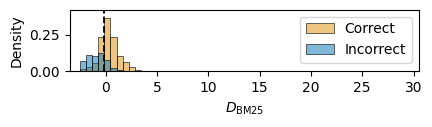

LitQA2-options


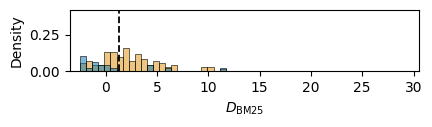

DRUID


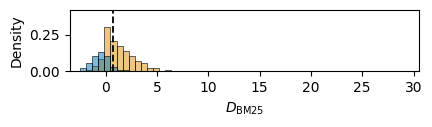

jaccard_sim
NQ


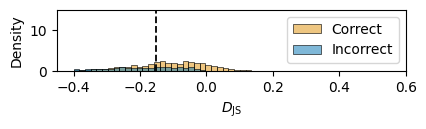

LitQA2-options


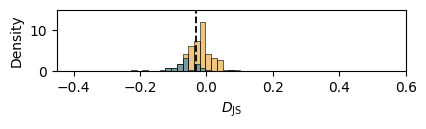

DRUID


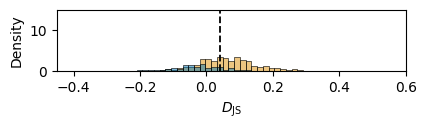

bert_score
NQ


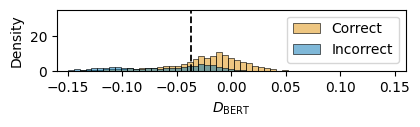

LitQA2-options


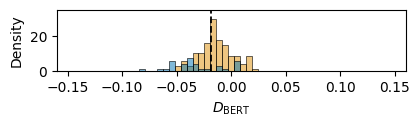

DRUID


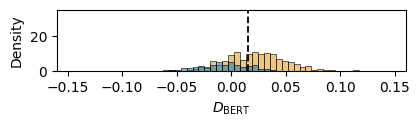

In [126]:
def get_helpful_sim_score(row, metric):
    if 'is_helpful_chunk' in row.index:
        # return the highest sim score among helpful chunks
        return max([row[metric][ix] for ix in range(len(row.is_helpful_chunk)) if row.is_helpful_chunk[ix]])
    return row[metric][row.gold_chunk_ix]

def get_gold_max_sim_diff(row, metric):
    num_chunks = len(row.chunks)
    if 'is_helpful_chunk' in row.index:
        max_sim_gold = max([row[metric][ix] for ix in range(num_chunks) if row.is_helpful_chunk[ix]])
        max_sim_no_gold = max([row[metric][ix] for ix in range(num_chunks) if not row.is_helpful_chunk[ix]])
        return max_sim_gold - max_sim_no_gold
    else:
        max_sim_no_gold = max([row[metric][ix] for ix in range(num_chunks) if ix!=row.gold_chunk_ix])
        return row[metric][row.gold_chunk_ix] - max_sim_no_gold

reranker_col = 'bge_reranker_v2_gemma_rank'
xlim = {'bm25_score': [-3.5, 30.5],
        'jaccard_sim' : [-0.45, 0.60],
        'bert_score': [-0.16, 0.16]}
ylim = {'bm25_score': [0, 0.42],
        'jaccard_sim': [0, 15],
        'bert_score': [0, 35]}
n_bins = {'bm25_score': 55,
          'jaccard_sim': 55,
          'bert_score': 55}
binrange = {'bm25_score': [-2.5, 30],
            'jaccard_sim': [-0.4, 0.55],
            'bert_score': [-0.15, 0.15]}

x_label = {'bm25_score': 'BM25',
            'jaccard_sim': 'JS',
            'bert_score': 'BERT'}

def check_binrange(binrange, data, col):
    assert data[col].min()>=binrange[0], f"Binrange does not cover min ({data[col].min()})"
    assert data[col].max()<=binrange[1], f"Binrange does not cover max ({data[col].max()})"

for sim_metric in ['bm25_score', 'jaccard_sim', 'bert_score']:
    print(sim_metric)
    for d_name in ['NQ', 'LitQA2-options', 'DRUID']:#, 'DRUID-q', 'NQ-t', 'LitQA2-options-t', 'DRUID-t', 'NQ-c', 'LitQA2-options-c', 'DRUID-c']:
        print(d_name)
        tmp_data = DATASETS[d_name]
        if 'gold_chunk_ix' in tmp_data.columns:
            tmp_data['correct'] = tmp_data.apply(lambda row: row.gold_chunk_ix==np.argmax(row[reranker_col]), axis=1)
        else:
            # DRUID data
            tmp_data['correct'] = tmp_data.apply(lambda row: row.is_helpful_chunk[np.argmax(row[reranker_col])], axis=1)
            
        tmp_data[f'helpful_{sim_metric}'] = tmp_data.apply(lambda row: get_helpful_sim_score(row, sim_metric), axis=1)
        tmp_data[f'{sim_metric}_max_diff'] = tmp_data.apply(lambda row: get_gold_max_sim_diff(row, sim_metric), axis=1)
        plt.figure(figsize=(4.5,0.8))
        if sim_metric in binrange:
            check_binrange(binrange[sim_metric], tmp_data, f'{sim_metric}_diff')
            sns.histplot(tmp_data, x=f'{sim_metric}_max_diff', hue='correct', stat='density', binrange=binrange[sim_metric], bins=n_bins[sim_metric], palette='colorblind')
            plt.xlim(xlim[sim_metric])
            plt.ylim(ylim[sim_metric])
        else:
            sns.histplot(tmp_data, x=f'{sim_metric}_max_diff', hue='correct', stat='density', palette='colorblind')
        if d_name == 'NQ':
            plt.legend(title=None, loc='upper right', labels=['Correct', 'Incorrect'])
        else:
            plt.legend('',frameon=False)
        plt.axvline(x=tmp_data[f'{sim_metric}_max_diff'].mean(), color='black', linestyle='--', linewidth=1.3)
        plt.xlabel(f'$D_{{\mathrm{{{x_label[sim_metric]}}}}}$')
        save_name = d_name.lower().replace('-', '_')
        plt.savefig(f"figures/sim_diffs/{save_name}_{sim_metric}_max_{reranker_col}.pdf", bbox_inches='tight')
        plt.show()

Check share of samples with diff values below 0 and how many of these were correct.
- Find that BM25 scores best seem to separate the error cases

In [102]:
def print_stats(data, sim_metric):
    break_val = -0.5 # threshold to report scores around
    diff_col = f'{sim_metric}_max_diff'
    print(f"{len(data[data[diff_col]<break_val])/len(data):.2f} of the data corresponds to a negative diff")
    if len(data[data[diff_col]<break_val])/len(data) > 0:
        print(f"The model is correct on {len(data[(data[diff_col]<break_val) & (data.correct)])/len(data[data[diff_col]<break_val]):.2f} of these")
    
    print(f"{len(data[data[diff_col]>=break_val])/len(data):.2f} of the data corresponds to a positive diff")
    print(f"The model is correct on {len(data[(data[diff_col]>=break_val) & (data.correct)])/len(data[data[diff_col]>=break_val]):.2f} of these")

for sim_metric in ['bm25_score', 'jaccard_sim', 'bert_score']:
    print(sim_metric)
    for d_name in ['NQ', 'LitQA2-options', 'DRUID', 'DRUID-q', 'NQ-t', 'LitQA2-options-t', 'DRUID-t']:
        print(d_name)
        print_stats(DATASETS[d_name], sim_metric)
        print()

bm25_score
NQ
0.32 of the data corresponds to a negative diff
The model is correct on 0.31 of these
0.68 of the data corresponds to a positive diff
The model is correct on 0.85 of these

LitQA2-options
0.31 of the data corresponds to a negative diff
The model is correct on 0.47 of these
0.69 of the data corresponds to a positive diff
The model is correct on 0.92 of these

DRUID
0.20 of the data corresponds to a negative diff
The model is correct on 0.24 of these
0.80 of the data corresponds to a positive diff
The model is correct on 0.85 of these

DRUID-q
0.22 of the data corresponds to a negative diff
The model is correct on 0.32 of these
0.78 of the data corresponds to a positive diff
The model is correct on 0.89 of these

NQ-t
0.25 of the data corresponds to a negative diff
The model is correct on 0.42 of these
0.75 of the data corresponds to a positive diff
The model is correct on 0.88 of these

LitQA2-options-t
0.27 of the data corresponds to a negative diff
The model is correct o

### Get data subsets based on sign of D

In [103]:
def get_data_subsets(data):
    data_neg_diff = data[data['bm25_score_max_diff']<-0.5].copy()
    data_pos_diff = data[data['bm25_score_max_diff']>=-0.5].copy()
    return data_neg_diff, data_pos_diff

nq_data_neg, nq_data_pos = get_data_subsets(nq_data)
litqao_data_neg, litqao_data_pos = get_data_subsets(litqao_data)
druid_data_neg, druid_data_pos = get_data_subsets(druid_data)

## Get TREC metrics for reranker performance
Compare against gold labels and similarity metrics.

List updated datasets

In [ ]:
DATASETS = {"NQ": nq_data, "LitQA2-options": litqao_data, "DRUID": druid_data, "DRUID-q": druidq_data,
            "NQ_sub": nq_data_sub, "LitQA2-options_sub": litqao_data_sub, "DRUID_sub": druid_data_sub, # these three datasets contain subsampled passages 
            "NQ-t": nq_t_data, "LitQA2-options-t": litqao_t_data, "DRUID-t": druid_t_data, # these three datasets contain passages with prepended titles
            "NQ-c": nq_c_data, "LitQA2-options-c": litqao_c_data, # these two datasets contain passages with prepended contexts
            # "DRUID-neg-diff": druid_data_neg, "DRUID-pos-diff": druid_data_pos # these two datasets are defined later in the notebook to further study samples with high vs. low BM25 scores for gold chunks
            }

Define useful functions

In [98]:
k_values = [1, 2, 3, 4, 5, 10]

def get_rerank_metrics(qrels, results):
    # qrels and results should be dicts, with one (key, val) per data sample
    def get_dict_for_trec_eval(d):
        # input: {"0": [1, 0, 0], "1": [0, 1, 0]}
        # output: {"0": {"0": 1, "1": 0, "2": 0], "1": ["0": 0, "1": 1, "2": 0]}
        new_d = {}
        for key, val in d.items():
            d_entry = {str(i): i_val for i, i_val in enumerate(val)}
            new_d[key] = d_entry
        return new_d
    
    ndcg_string = "ndcg_cut." + ",".join([str(k) for k in k_values])
    recall_string = "recall." + ",".join([str(k) for k in k_values])
    precision_string = "P." + ",".join([str(k) for k in k_values])
    evaluator = pytrec_eval.RelevanceEvaluator(get_dict_for_trec_eval(qrels), {ndcg_string, recall_string, precision_string})
    scores = evaluator.evaluate(get_dict_for_trec_eval(results))

    # init
    ndcg = {}
    recall = {}
    precision = {}
    ndcg_scores = {}
    recall_scores = {}
    precision_scores = {}
    for k in k_values:
        ndcg[f"NDCG@{k}"] = 0.0
        recall[f"Recall@{k}"] = 0.0
        precision[f"P@{k}"] = 0.0
        ndcg_scores[f"NDCG@{k}_scores"] = []
        recall_scores[f"Recall@{k}_scores"] = []
        precision_scores[f"P@{k}_scores"] = []
    
    # store scores
    for query_id in scores.keys():
        for k in k_values:
            ndcg[f"NDCG@{k}"] += scores[query_id]["ndcg_cut_" + str(k)]
            recall[f"Recall@{k}"] += scores[query_id]["recall_" + str(k)]
            precision[f"P@{k}"] += scores[query_id]["P_"+ str(k)]
            ndcg_scores[f"NDCG@{k}_scores"].append(round(scores[query_id]["ndcg_cut_" + str(k)], 5))
            recall_scores[f"Recall@{k}_scores"].append(round(scores[query_id]["recall_" + str(k)], 5))
            precision_scores[f"P@{k}_scores"].append(round(scores[query_id]["P_"+ str(k)], 5))

    # get averaged scores
    for k in k_values:
        ndcg[f"NDCG@{k}"] = round(ndcg[f"NDCG@{k}"]/len(scores), 5)
        recall[f"Recall@{k}"] = round(recall[f"Recall@{k}"]/len(scores), 5)
        precision[f"P@{k}"] = round(precision[f"P@{k}"]/len(scores), 5)
        
        
    return ndcg, recall, precision, ndcg_scores, recall_scores, precision_scores

def get_ordered_scores(scores, ixs_list):
    ordered_scores = [None]*len(scores)
    for ix, real_ix in enumerate(ixs_list):
        ordered_scores[real_ix] = scores[ix]
    return ordered_scores

def get_qrels(row):
    qrels = [0]*len(row.chunks)
    qrels[row.gold_chunk_ix] = 1
    return qrels
    
def get_qrels_druid(row):
    qrels = [1 if val else 0 for val in row.is_helpful_chunk]
    return qrels

# get qrels corresponding to similarity metrics
# retain the same number of relevant passages as gold (top sampled)
def get_integer_qrels(row, qrel_source):
    # detect if DRUID data, treated differently
    if "is_helpful_chunk" in row.index:
        num_gold_chunks = sum(row.is_helpful_chunk)
    else:
        num_gold_chunks = 1
        
    qrels = [0]*len(row.chunks)
    for ix in np.argsort(-np.array(row[qrel_source]))[:num_gold_chunks]:
        qrels[ix] = 1
    return qrels

### Evaluate different rerankers against different metrics (qrel sources)

In [105]:
qrel_sources = ["gold", "jaccard_sim", "bert_score", "bm25_score"]
# also compare against baseline rerankers based on simple metrics
metrics = ['jaccard_sim', 'bert_score', 'bm25_score']

results = []
for reranker in RERANKERS + metrics:
    print(reranker)
    for d_name, dataset in DATASETS.items():
        print(d_name)
        # check that the reranker under consideration has been applied to the dataset
        if reranker == 'cohere' or f'{reranker}_rank' in dataset.columns or reranker in dataset.columns:
            tmp_data = dataset.copy()
            tmp_data = tmp_data.set_index(pd.Series([str(i) for i in tmp_data.index]))
            for qrel_source in qrel_sources:
                print(f"QREL: {qrel_source}")
                if qrel_source == "gold":
                    if "is_helpful_chunk" in dataset.columns:
                        qrels = tmp_data.apply(get_qrels_druid, axis=1)
                    else:
                        qrels = tmp_data.apply(get_qrels, axis=1)
                else:
                    qrels = tmp_data.apply(lambda row: get_integer_qrels(row, qrel_source), axis=1)
                if reranker == 'cohere':
                    ndcg, recall, precision, ndcg_scores, recall_scores, precision_scores = get_rerank_metrics(qrels.to_dict(), tmp_data.apply(lambda row: get_ordered_scores(row.reranker_top_scores, row.reranker_top_ixs), axis=1).to_dict())
                elif reranker not in metrics:
                    ndcg, recall, precision, ndcg_scores, recall_scores, precision_scores = get_rerank_metrics(qrels.to_dict(), tmp_data[f'{reranker}_rank'].to_dict())
                else:
                    ndcg, recall, precision, ndcg_scores, recall_scores, precision_scores = get_rerank_metrics(qrels.to_dict(), tmp_data[reranker].to_dict())
                print(ndcg)
                print(recall)
                print(precision)
                print()
                results_entry = {'reranker': reranker,
                                'dataset': d_name,
                                'qrel_source': qrel_source}
                # unfold retriever metrics
                for res in [ndcg, recall, precision, ndcg_scores, recall_scores, precision_scores]:
                    for key, val in res.items():
                        results_entry[key] = val
                results.append(results_entry)
        else:
            print(f"Error: reranker {reranker} not implemented for {d_name}.")

cohere
NQ
QREL: gold
{'NDCG@1': 0.64751, 'NDCG@2': 0.71381, 'NDCG@3': 0.74347, 'NDCG@4': 0.75997, 'NDCG@5': 0.77397, 'NDCG@10': 0.7991}
{'Recall@1': 0.64751, 'Recall@2': 0.75259, 'Recall@3': 0.81192, 'Recall@4': 0.85023, 'Recall@5': 0.88641, 'Recall@10': 0.96196}
{'P@1': 0.64751, 'P@2': 0.3763, 'P@3': 0.27064, 'P@4': 0.21256, 'P@5': 0.17728, 'P@10': 0.0962}

QREL: jaccard_sim
{'NDCG@1': 0.14206, 'NDCG@2': 0.25502, 'NDCG@3': 0.35571, 'NDCG@4': 0.42021, 'NDCG@5': 0.45232, 'NDCG@10': 0.49717}
{'Recall@1': 0.14206, 'Recall@2': 0.3211, 'Recall@3': 0.52248, 'Recall@4': 0.67225, 'Recall@5': 0.75525, 'Recall@10': 0.89146}
{'P@1': 0.14206, 'P@2': 0.16055, 'P@3': 0.17416, 'P@4': 0.16806, 'P@5': 0.15105, 'P@10': 0.08915}

QREL: bert_score
{'NDCG@1': 0.19979, 'NDCG@2': 0.28656, 'NDCG@3': 0.3665, 'NDCG@4': 0.42895, 'NDCG@5': 0.46167, 'NDCG@10': 0.50922}
{'Recall@1': 0.19979, 'Recall@2': 0.33732, 'Recall@3': 0.49721, 'Recall@4': 0.64219, 'Recall@5': 0.72679, 'Recall@10': 0.87071}
{'P@1': 0.19979, 'P

## Plots for main paper

In [106]:
plot_data = pd.DataFrame(results)
reranker_labels = {'cohere': 'Cohere', 
                   'bge_reranker_v2_gemma': 'BGE', 
                   'jina_reranker_v1_turbo_en': 'Jina turbo', 
                   'jina_reranker_v2_base_multilingual': 'Jina base', 
                   'gpt4o_mini': 'GPT-4o m', 
                   'gpt4o': 'GPT-4o', 
                   'o1_mini': 'o1 m',
                   'bm25_score': 'BM25',
                   'jaccard_sim': 'JS', 
                   'bert_score': 'BERT'}
plot_data['reranker'] = plot_data.reranker.map(reranker_labels)

Re-ranker performance

/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_96234/410763195.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['NQ', 'LitQA2', 'DRUID'])


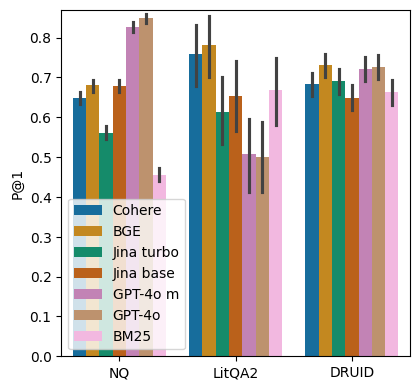

In [23]:
plt.figure(figsize=(4.5,4.5))

rerankers_to_plot = ['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']
ax = sns.barplot(plot_data[(plot_data.reranker.isin(rerankers_to_plot)) &
                      (plot_data.qrel_source == 'gold') &
                      (plot_data.dataset.isin(['NQ', 'LitQA2-options', 'DRUID']))
                      ].explode('P@1_scores'), 
            x='dataset', 
            y='P@1_scores', 
            hue='reranker',
            errorbar='ci',
            palette='colorblind')

ax.set_xticklabels(['NQ', 'LitQA2', 'DRUID'])
ax.get_legend().set_title("")
plt.xlabel('')
plt.ylabel('P@1')
plt.ylim([0,0.87])
plt.savefig(f"figures/reranker_performance/all_precision.pdf", bbox_inches='tight')
plt.show()

Main - re-ranker performance table

In [24]:
metric = 'P@1_scores'
tab_data = []
for rerank_ix, reranker in enumerate(['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']):
    dict_entry = {'Re-ranker': reranker}
    for d_name in ['NQ', 'LitQA2-options', 'DRUID']:
        tmp_data = plot_data[(plot_data.dataset==d_name) & (plot_data.reranker==reranker)].copy()
        if tmp_data.empty:
            dict_entry[d_name] = ''
            continue
        gold_res = tmp_data[(tmp_data.qrel_source=='gold')][metric].explode().mean()
        bm25_res = tmp_data[(tmp_data.qrel_source=='bm25_score')][metric].explode().mean()
        dict_entry[d_name] = f"${gold_res:.2f}\ {{\scriptstyle ({gold_res-bm25_res:.2f})}}$"
    tab_data.append(dict_entry)
    
tab_data = pd.DataFrame(tab_data)
print(tab_data.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Re-ranker & NQ & LitQA2-options & DRUID \\
\midrule
Cohere & $0.65\ {\scriptstyle (0.13)}$ & $0.76\ {\scriptstyle (0.08)}$ & $0.68\ {\scriptstyle (-0.21)}$ \\
BGE & $0.68\ {\scriptstyle (0.17)}$ & $0.78\ {\scriptstyle (0.10)}$ & $0.73\ {\scriptstyle (-0.15)}$ \\
Jina turbo & $0.56\ {\scriptstyle (0.08)}$ & $0.61\ {\scriptstyle (0.03)}$ & $0.69\ {\scriptstyle (-0.20)}$ \\
Jina base & $0.68\ {\scriptstyle (0.15)}$ & $0.65\ {\scriptstyle (0.06)}$ & $0.65\ {\scriptstyle (-0.20)}$ \\
GPT-4o m & $0.83\ {\scriptstyle (0.37)}$ & $0.51\ {\scriptstyle (0.10)}$ & $0.72\ {\scriptstyle (-0.10)}$ \\
GPT-4o & $0.85\ {\scriptstyle (0.40)}$ & $0.50\ {\scriptstyle (0.10)}$ & $0.73\ {\scriptstyle (-0.10)}$ \\
BM25 & $0.46\ {\scriptstyle (-0.54)}$ & $0.67\ {\scriptstyle (-0.33)}$ & $0.66\ {\scriptstyle (-0.33)}$ \\
\bottomrule
\end{tabular}



DRUID subsets

In [107]:
metric = 'P@1_scores'
tab_data = []
for rerank_ix, reranker in enumerate(['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']):
    dict_entry = {'Re-ranker': reranker}
    for d_name in ['DRUID-neg-diff', 'DRUID-pos-diff']:
        tmp_data = plot_data[(plot_data.dataset==d_name) & (plot_data.reranker==reranker)].copy()
        if tmp_data.empty:
            dict_entry[d_name] = ''
            continue
        gold_res = tmp_data[(tmp_data.qrel_source=='gold')][metric].explode().mean()
        bm25_res = tmp_data[(tmp_data.qrel_source=='bm25_score')][metric].explode().mean()
        dict_entry[d_name] = f"${gold_res:.2f}\ {{\scriptstyle ({gold_res-bm25_res:.2f})}}$"
    tab_data.append(dict_entry)
    
tab_data = pd.DataFrame(tab_data)
print(tab_data.to_latex(index=False))

\begin{tabular}{lll}
\toprule
Re-ranker & DRUID-neg-diff & DRUID-pos-diff \\
\midrule
Cohere & $0.10\ {\scriptstyle (-0.78)}$ & $0.83\ {\scriptstyle (-0.07)}$ \\
BGE & $0.24\ {\scriptstyle (-0.56)}$ & $0.85\ {\scriptstyle (-0.05)}$ \\
Jina turbo & $0.13\ {\scriptstyle (-0.72)}$ & $0.83\ {\scriptstyle (-0.07)}$ \\
Jina base & $0.18\ {\scriptstyle (-0.64)}$ & $0.77\ {\scriptstyle (-0.09)}$ \\
GPT-4o m & $0.34\ {\scriptstyle (-0.41)}$ & $0.82\ {\scriptstyle (-0.02)}$ \\
GPT-4o & $0.32\ {\scriptstyle (-0.40)}$ & $0.83\ {\scriptstyle (-0.02)}$ \\
BM25 & $0.00\ {\scriptstyle (-0.99)}$ & $0.83\ {\scriptstyle (-0.17)}$ \\
\bottomrule
\end{tabular}



Alleviation method for DRUID: Tuned prompt

In [26]:
metric = 'P@1_scores'
tab_data = []
for rerank_ix, reranker in enumerate(['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']):
    dict_entry = {'Re-ranker': reranker}
    for d_name in ['DRUID', 'DRUID-q']:
        tmp_data = plot_data[(plot_data.dataset==d_name) & (plot_data.reranker==reranker)].copy()
        if tmp_data.empty:
            dict_entry[d_name] = ''
            continue
        gold_res = tmp_data[(tmp_data.qrel_source=='gold')][metric].explode().mean()
        bm25_res = tmp_data[(tmp_data.qrel_source=='bm25_score')][metric].explode().mean()
        dict_entry[d_name] = f"${gold_res:.2f}\ {{\scriptstyle ({gold_res-bm25_res:.2f})}}$"
    tab_data.append(dict_entry)
    
tab_data = pd.DataFrame(tab_data)
print(tab_data.to_latex(index=False))

\begin{tabular}{lll}
\toprule
Re-ranker & DRUID & DRUID-q \\
\midrule
Cohere & $0.68\ {\scriptstyle (-0.21)}$ & $0.69\ {\scriptstyle (-0.18)}$ \\
BGE & $0.73\ {\scriptstyle (-0.15)}$ & $0.77\ {\scriptstyle (-0.06)}$ \\
Jina turbo & $0.69\ {\scriptstyle (-0.20)}$ & $0.72\ {\scriptstyle (-0.17)}$ \\
Jina base & $0.65\ {\scriptstyle (-0.20)}$ & $0.72\ {\scriptstyle (-0.14)}$ \\
GPT-4o m & $0.72\ {\scriptstyle (-0.10)}$ & $0.79\ {\scriptstyle (-0.02)}$ \\
GPT-4o & $0.73\ {\scriptstyle (-0.10)}$ & $0.83\ {\scriptstyle (0.05)}$ \\
BM25 & $0.66\ {\scriptstyle (-0.33)}$ & $0.68\ {\scriptstyle (-0.31)}$ \\
\bottomrule
\end{tabular}



Alleviation method: Prepending titles

In [73]:
metric = 'P@1_scores'
tab_data = []
for rerank_ix, reranker in enumerate(['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']):
    dict_entry = {'Re-ranker': reranker}
    for d_name in ['NQ-t', 'LitQA2-options-t', 'DRUID-t']:
        tmp_data = plot_data[(plot_data.dataset==d_name) & (plot_data.reranker==reranker)].copy()
        if tmp_data.empty:
            dict_entry[d_name] = ''
            continue
        gold_res = tmp_data[(tmp_data.qrel_source=='gold')][metric].explode().mean()
        bm25_res = tmp_data[(tmp_data.qrel_source=='bm25_score')][metric].explode().mean()
        dict_entry[d_name] = f"${gold_res:.2f}\ {{\scriptstyle ({gold_res-bm25_res:.2f})}}$"
    tab_data.append(dict_entry)
    
tab_data = pd.DataFrame(tab_data)
print(tab_data.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Re-ranker & NQ-t & LitQA2-options-t & DRUID-t \\
\midrule
Cohere & $0.77\ {\scriptstyle (0.23)}$ & $0.79\ {\scriptstyle (0.09)}$ & $0.71\ {\scriptstyle (-0.17)}$ \\
BGE & $0.76\ {\scriptstyle (0.23)}$ & $0.80\ {\scriptstyle (0.10)}$ & $0.74\ {\scriptstyle (-0.14)}$ \\
Jina turbo & $0.69\ {\scriptstyle (0.16)}$ & $0.66\ {\scriptstyle (0.02)}$ & $0.71\ {\scriptstyle (-0.17)}$ \\
Jina base & $0.78\ {\scriptstyle (0.24)}$ & $0.77\ {\scriptstyle (0.07)}$ & $0.69\ {\scriptstyle (-0.18)}$ \\
GPT-4o m & $0.85\ {\scriptstyle (0.34)}$ & $0.50\ {\scriptstyle (0.08)}$ & $0.72\ {\scriptstyle (-0.08)}$ \\
GPT-4o & $0.85\ {\scriptstyle (0.36)}$ & $0.51\ {\scriptstyle (0.07)}$ & $0.74\ {\scriptstyle (-0.06)}$ \\
BM25 & $0.50\ {\scriptstyle (-0.49)}$ & $0.70\ {\scriptstyle (-0.30)}$ & $0.68\ {\scriptstyle (-0.32)}$ \\
\bottomrule
\end{tabular}



Alleviation method: Prepending contexts

In [74]:
metric = 'P@1_scores'
tab_data = []
for rerank_ix, reranker in enumerate(['Cohere', 'BGE', 'Jina turbo', 'Jina base', 'GPT-4o m', 'GPT-4o', 'BM25']):
    dict_entry = {'Re-ranker': reranker}
    for d_name in ['NQ-c', 'LitQA2-options-c']:
        tmp_data = plot_data[(plot_data.dataset==d_name) & (plot_data.reranker==reranker)].copy()
        if tmp_data.empty:
            dict_entry[d_name] = ''
            continue
        gold_res = tmp_data[(tmp_data.qrel_source=='gold')][metric].explode().mean()
        bm25_res = tmp_data[(tmp_data.qrel_source=='bm25_score')][metric].explode().mean()
        dict_entry[d_name] = f"${gold_res:.2f}\ {{\scriptstyle ({gold_res-bm25_res:.2f})}}$"
    tab_data.append(dict_entry)
    
tab_data = pd.DataFrame(tab_data)
print(tab_data.to_latex(index=False))

\begin{tabular}{lll}
\toprule
Re-ranker & NQ-c & LitQA2-options-c \\
\midrule
Cohere & $0.72\ {\scriptstyle (0.24)}$ & $0.69\ {\scriptstyle (0.06)}$ \\
BGE & $0.72\ {\scriptstyle (0.26)}$ & $0.70\ {\scriptstyle (0.05)}$ \\
Jina turbo & $0.62\ {\scriptstyle (0.15)}$ & $0.60\ {\scriptstyle (-0.04)}$ \\
Jina base & $0.74\ {\scriptstyle (0.27)}$ & $0.63\ {\scriptstyle (0.09)}$ \\
GPT-4o m & $0.80\ {\scriptstyle (0.37)}$ & $0.47\ {\scriptstyle (0.12)}$ \\
GPT-4o & $0.81\ {\scriptstyle (0.38)}$ & $0.46\ {\scriptstyle (0.11)}$ \\
BM25 & $0.44\ {\scriptstyle (-0.55)}$ & $0.58\ {\scriptstyle (-0.42)}$ \\
\bottomrule
\end{tabular}



## Plots for appendix

Appendix - Investigate effect of better prompt for Figure 1

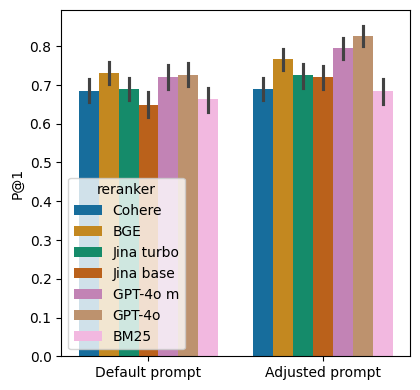

In [108]:
plt.figure(figsize=(4.5,4.5))
sns.barplot(plot_data[(plot_data.reranker.isin(rerankers_to_plot)) &
                      (plot_data.qrel_source == 'gold') &
                      (plot_data.dataset.isin(['DRUID', 'DRUID-q']))
                      ].explode('P@1_scores'), 
            x='dataset', 
            y='P@1_scores', 
            hue='reranker',
            errorbar='ci',
            palette='colorblind')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['Default prompt', 'Adjusted prompt'])
plt.xlabel('')
plt.ylabel('P@1')
plt.savefig(f"figures/reranker_performance/druid_tuned_precision.pdf", bbox_inches='tight')
plt.show()

Appendix - Investigate difference in results if use another metric

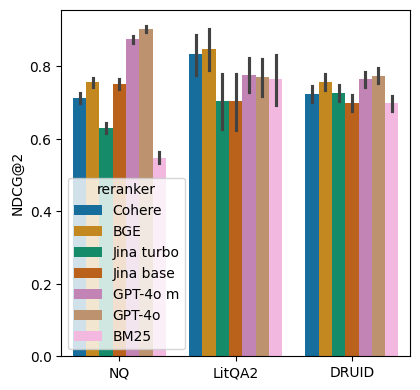

In [38]:
plt.figure(figsize=(4.5,4.5))
sns.barplot(plot_data[(plot_data.reranker.isin(rerankers_to_plot)) &
                      (plot_data.qrel_source == 'gold') &
                      (plot_data.dataset.isin(['NQ', 'LitQA2-options', 'DRUID']))
                      ].explode('NDCG@2_scores'), 
            x='dataset', 
            y='NDCG@2_scores', 
            hue='reranker',
            errorbar='ci',
            palette='colorblind')
plt.xticks([0, 1, 2], ['NQ', 'LitQA2', 'DRUID'])
plt.xlabel('')
plt.ylabel('NDCG@2')
plt.savefig(f"figures/reranker_performance/all_ndcg.pdf", bbox_inches='tight')
plt.show()

Appendix - Investigate effect of adding options to query for LitQa2

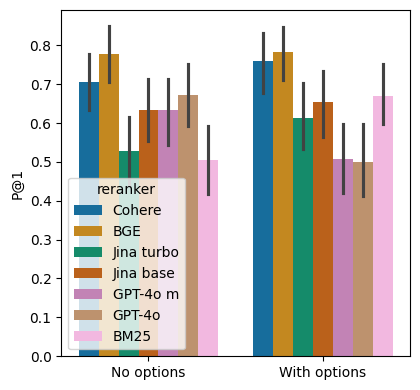

In [39]:
plt.figure(figsize=(4.5,4.5))
sns.barplot(plot_data[(plot_data.reranker.isin(rerankers_to_plot)) &
                      (plot_data.qrel_source == 'gold') &
                      (plot_data.dataset.isin(['LitQA2-options', 'LitQA2']))
                      ].explode('P@1_scores'), 
            x='dataset', 
            y='P@1_scores', 
            hue='reranker',
            errorbar='ci',
            palette='colorblind')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['No options', 'With options'])
plt.xlabel('')
plt.ylabel('P@1')
plt.savefig(f"figures/reranker_performance/litqa_options_precision.pdf", bbox_inches='tight')
plt.show()

### Get data examples and corresponding scores (Appendix)

In [130]:
def print_sample(row):
    print(f"BM25 max diff: {row.bm25_score_max_diff:.2f}")
    print(f"BM25 diff: {row.bm25_score_diff:.2f}")
    print(f"Question: {row.question}")
    
    most_similar_chunk = row.chunks[np.argmax(row.bm25_score)]
    if 'is_helpful_chunk' in row:
        gold_chunk = row.chunks[row.is_helpful_chunk.index(True)]
    else:
        gold_chunk = row.chunks[row.gold_chunk_ix]
    if isinstance(row.chunks[0], dict):
        gold_chunk = gold_chunk['chunk']
        most_similar_chunk = most_similar_chunk['chunk']
    print(f"Gold chunk: {gold_chunk}")
    print(f"Most similar chunk: {most_similar_chunk}")

NQ

In [133]:
print_sample(nq_data.sort_values(by='bm25_score_diff').iloc[0])
print()
print_sample(nq_data.sort_values(by='bm25_score_diff').iloc[7])
print()
print_sample(nq_data[nq_data.question=='how many episodes are there in dragon ball z?'].iloc[0])
print()
print_sample(nq_data.sort_values(by='bm25_score_diff').iloc[-1])
print()

BM25 max diff: -4.92
BM25 diff: -1.53
Question: who won the academy award for best original musical score?
Gold chunk: <Table> <Tr> <Th> Year </Th> <Th> Film </Th> <Th> Nominees </Th> </Tr> <Tr> <Td> (83rd) </Td> </Tr> <Tr> <Td> The Social Network </Td> <Td> Trent Reznor & Atticus Ross </Td> </Tr> <Tr> <Td> How to Train Your Dragon </Td> <Td> John Powell </Td> </Tr> <Tr> <Td> Inception </Td> <Td> Hans Zimmer </Td> </Tr> <Tr> <Td> The King's Speech </Td> <Td> Alexandre Desplat </Td> </Tr> <Tr> <Td> 127 Hours </Td> <Td> A.R. Rahman </Td> </Tr> <Tr> <Td> 2011 (84th) </Td> </Tr> <Tr> <Td> The Artist </Td> <Td> Ludovic Bource </Td> </Tr> <Tr> <Td> The Adventures of Tintin </Td> <Td> John Williams </Td> </Tr> <Tr> <Td> Hugo </Td> <Td> Howard Shore </Td> </Tr> <Tr> <Td> Tinker Tailor Soldier Spy </Td> <Td> Alberto Iglesias </Td> </Tr> <Tr> <Td> War Horse </Td> <Td> John Williams </Td> </Tr> <Tr> <Td> 2012 (85th) </Td> </Tr> <Tr> <Td> Life of Pi </Td> <Td> Mychael Danna </Td> </Tr> <Tr> <Td> A

LitQA2

In [134]:
print_sample(litqao_data.sort_values(by='bm25_score_diff').iloc[0])
print()
print_sample(litqao_data.sort_values(by='bm25_score_diff').iloc[-1])
print()

BM25 max diff: -5.97
BM25 diff: 1.64
Question: How long do mouse neurons survive following CRISPR inactivation of HSPA5? (A) 14 days, (B) 3 days, (C) 5 days, (D) 10 days, (E) 28 days, or (F) not enough info?
Gold chunk: We selected Hspa5, a top hit that was not previously identified as a hit in iPSC-derived neurons, for individual validation. In mouse embryonic fibroblasts expressing CRISPRi machinery, we confirmed that an sgRNA targeting Hspa5 (sgHspa5) suppresses expression of the endogenous Hspa5 transcript (Fig. 5a). In primary neurons cultured from conditional CRISPRi mice, AAVs delivering sgHspa5 led to marked Cre-dependent neuronal death within 2 weeks of expression (Fig. 5b,c). Furthermore, injection of this sgRNA into neonatal mice led to a severe motor phenotype after approximately 2 weeks in mice co-expressing hSyn1-Cre, but not the sgRNA alone (Supplementary Videos 1 and 2), and the brains from mice with sgHspa5 + hSyn1-Cre were markedly smaller in size relative to sgHspa5-

DRUID

In [136]:
print_sample(druid_data.sort_values(by='bm25_score_diff').iloc[0])
print()
print_sample(druid_data[druid_data.question=='The Police Service of Northern Ireland (PSNI) are to pilot a Snapchat social media platform initiative to monitor social mitigation compliance in Northern Ireland.'].iloc[0])
print()
print_sample(druid_data.sort_values(by='bm25_score_diff').iloc[3])
print()
print_sample(druid_data.sort_values(by='bm25_score_diff').iloc[-2])

BM25 max diff: -4.71
BM25 diff: -2.47
Question: “Before the pandemic, just over 40,000 were on continuing UI claims. Now, there are well over 100,000 on state or federal UI benefits.”
Gold chunk: Department of Workforce Development datashows that in the week ending on March 7, 2020, there were 41,015 unemployment claims statewide. For the week of May 22, 202, there were 127,745 claims.
Most similar chunk: Lisa Subeck stated on February 16, 2024 in X, formerly Twitter: "The United States is an outlier, one of only about half a dozen countries, without any guarantee of paid leave for new parents and/or other health care needs." Tim Kaine stated on March 15, 2022 in a tweet.: "Virginia women are paid 80 cents for every dollar paid to Virginia men." Mandela Barnes stated on May 23, 2021 in Twitter: "It’s been over 50 years since minimum (wage) and inflation parted ways, then over a decade since the federal minimum went up at all." Glenn Grothman stated on June 8, 2021 in Twitter: "We have 